In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

/var/folders/my/rbl5q7yd7pxb2yk9_qjc7mjr0000gn/T/ipykernel_47646/4086747370.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# plt.style.use('seaborn')

## Load Datasets

In [3]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


<Axes: xlabel='age', ylabel='Count'>

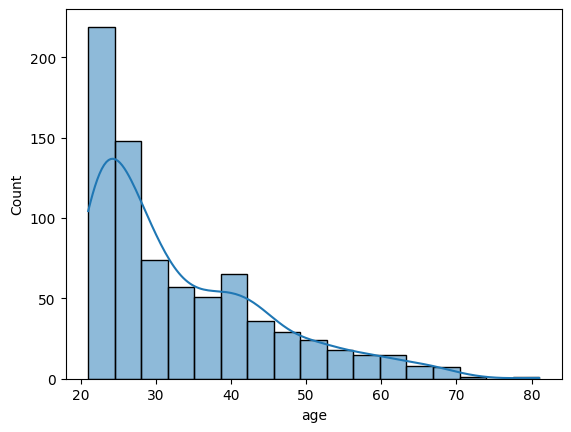

In [5]:
sns.histplot(df_diabetes['age'], kde=True)  # Basic displot

In [6]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [7]:
features = df_diabetes.values[:,:8]

In [8]:
labels = df_diabetes.values[:,8:]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

## Define Model

In [10]:
# define the keras sequential model
model = Sequential()

In [11]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network

# Long-Short Term Memory Neural Network

# Dll...


In [12]:
# relu = range(0,infinit)

In [13]:
model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(6, activation='relu')) # 3rd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile Model

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [16]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 0s 709us/step - loss: 1.0380 - accuracy: 0.6270
Epoch 2/250
77/77 [==============================] - 0s 580us/step - loss: 0.6905 - accuracy: 0.6515
Epoch 3/250
77/77 [==============================] - 0s 509us/step - loss: 0.6824 - accuracy: 0.6531
Epoch 4/250
77/77 [==============================] - 0s 468us/step - loss: 0.6757 - accuracy: 0.6498
Epoch 5/250
77/77 [==============================] - 0s 518us/step - loss: 0.6706 - accuracy: 0.6498
Epoch 6/250
77/77 [==============================] - 0s 471us/step - loss: 0.6663 - accuracy: 0.6515
Epoch 7/250
77/77 [==============================] - 0s 533us/step - loss: 0.6627 - accuracy: 0.6515
Epoch 8/250
77/77 [==============================] - 0s 543us/step - loss: 0.6599 - accuracy: 0.6515
Epoch 9/250
77/77 [==============================] - 0s 547us/step - loss: 0.6575 - accuracy: 0.6515
Epoch 10/250
77/77 [==============================] - 0s 499us/step - loss: 0.6554 - accura

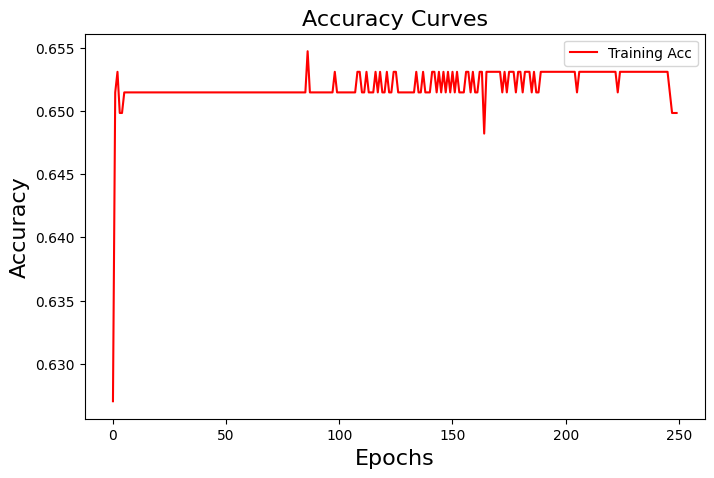

In [17]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 65.58


---